In [26]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [28]:
import pandas as pd
data = pd.read_csv('dataset (1).csv')
data.head(10)

,complexity,criticality,technology,no_of_requirements,BRD_Availability,FS_Availability,development_methodology,change_in_schedule,release_duration,documentation_quality,requirement_validation,environment,automation_scope,environment_downtime,unit_test_defects,build_quality,dependencies_criticality,type_of_requirement,no_of_test_scenerio,no_of_test_cases,no_of_defects,defect
0,High,High,"Java 8 , Oracle 12g, Thick client",3,Yes,Yes,Waterfall,No,12,5,Yes,"Dev,SIT, UAT &Production",No,Yes,5,3,Medium,Non Functional,25,150,10,No
1,High,High,"Java 8 , Otracle 12g, Thick client",38,Yes,Yes,Waterfall,No,24,5,Yes,"Dev,SIT, UAT &Production",No,Yes,70,3,Medium,Functional,70,700,100,Yes
2,Medium,Medium,. NET,24,No,Yes,Hybrid Agile,No,8,4,Yes,"Integration, Regression, Production",No,Yes,0,3,Medium,Functional,0,167,12,No
3,Medium,Medium,. NET,15,No,Yes,Hybrid Agile,No,7,4,Yes,"Integration, Regression, Production.",No,Yes,0,3,Medium,Functional,0,130,6,No
4,Medium,High,EY Canvas,6,Yes,Yes,Iterative,Yes,4,5,Yes,"SIT, UAT, Production, Training",No,Yes,0,3,Medium,Functional,25,150,120,Yes
5,Medium,High,EY Canvas,6,Yes,Yes,Iterative,Yes,4,5,Yes,"SIT, UAT, Production, Training",No,Yes,0,3,Medium,Functional,28,180,200,Yes
6,High,High,SharePoint/SSIS Package,29,No,Yes,Hybrid Agile,Yes,4,5,Yes,SIT,No,Yes,30,3,High,Functional,350,750,255,Yes
7,High,High,SharePoint/SSIS Package,19,No,Yes,Hybrid Agile,Yes,4,5,Yes,SIT,No,Yes,30,3,High,Functional,250,550,235,Yes
8,Low,Medium,.NET,6,Yes,No,"Hybrid (Waterfall, Iterative)",No,13,4,Yes,SIT,Yes,No,0,3,Low,Functional,10,25,174,Yes
9,Medium,Low,.NET,3,Yes,No,Waterfall,No,2,5,Yes,"SIT, UAT",No,No,0,3,Medium,Functional,6,15,29,No


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   complexity                56 non-null     object
 1   criticality               56 non-null     object
 2   technology                56 non-null     object
 3   no_of_requirements        56 non-null     int64 
 4   BRD_Availability          56 non-null     object
 5   FS_Availability           56 non-null     object
 6   development_methodology   56 non-null     object
 7   change_in_schedule        56 non-null     object
 8   release_duration          56 non-null     int64 
 9   documentation_quality     56 non-null     int64 
 10  requirement_validation    56 non-null     object
 11  environment               56 non-null     object
 12  automation_scope          56 non-null     object
 13  environment_downtime      56 non-null     object
 14  unit_test_defects         56

In [30]:
data.columns

Index(['complexity', 'criticality', 'technology', 'no_of_requirements',
       'BRD_Availability', 'FS_Availability', 'development_methodology',
       'change_in_schedule', 'release_duration', 'documentation_quality',
       'requirement_validation', 'environment', 'automation_scope',
       'environment_downtime', 'unit_test_defects', 'build_quality',
       'dependencies_criticality', 'type_of_requirement',
       'no_of_test_scenerio', 'no_of_test_cases', 'no_of_defects', 'defect'],
      dtype='object')

In [31]:
data.dtypes

complexity                  object
criticality                 object
technology                  object
no_of_requirements           int64
BRD_Availability            object
FS_Availability             object
development_methodology     object
change_in_schedule          object
release_duration             int64
documentation_quality        int64
requirement_validation      object
environment                 object
automation_scope            object
environment_downtime        object
unit_test_defects            int64
build_quality                int64
dependencies_criticality    object
type_of_requirement         object
no_of_test_scenerio          int64
no_of_test_cases             int64
no_of_defects                int64
defect                      object
dtype: object

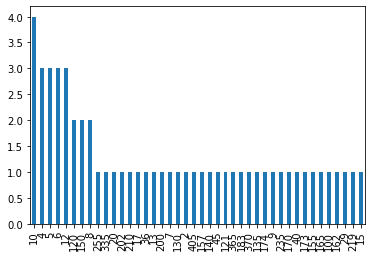

In [11]:
data['no_of_defects'].value_counts().plot.bar()

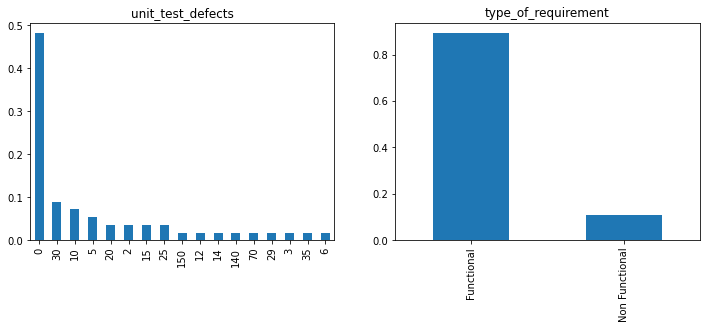

In [13]:
import matplotlib.pyplot as plt
plt.subplot(121)
data['unit_test_defects'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'unit_test_defects')

plt.subplot(122)
data['type_of_requirement'].value_counts(normalize=True).plot.bar(title= 'type_of_requirement')

plt.show()

In [32]:
data.isnull().sum()

complexity                  0
criticality                 0
technology                  0
no_of_requirements          0
BRD_Availability            0
FS_Availability             0
development_methodology     0
change_in_schedule          0
release_duration            0
documentation_quality       0
requirement_validation      0
environment                 0
automation_scope            0
environment_downtime        0
unit_test_defects           0
build_quality               0
dependencies_criticality    0
type_of_requirement         0
no_of_test_scenerio         0
no_of_test_cases            0
no_of_defects               0
defect                      0
dtype: int64

In [20]:
from google.colab import files
uploaded = files.upload()

Saving dataset2.csv to dataset2.csv


In [0]:
import random
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


def mean(numbers):
    return sum(numbers) / float(len(numbers))


def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)


def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent


def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions


def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0


def main():
    filename = 'dataset.csv'
    splitRatio = 0.67
    dataset = pd.read_csv('dataset.csv')
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print(('Split {0} rows into train={1} and test={2} rows').format(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print(('Accuracy: {0}%').format(accuracy))


main()